In [55]:
import pickle
import pandas as pd
import numpy as np
import copy
import string
import sys 
np.set_printoptions(threshold=sys.maxsize)

def to_str(var):
    return str(list(np.reshape(np.asarray(var), (1, np.size(var)))[0]))[1:-1]


with open('Data.pkl', 'rb') as f:
    data = pickle.load(f)
data_total = np.array(copy.deepcopy(data))
defaut_row = pd.read_excel('example_data.xlsx')
defaut = np.array(defaut_row)
defaut = defaut[48:95,5:]
data_total = data_total[:,5:52]
alphabet = string.ascii_lowercase+string.ascii_uppercase    
numbers = np.array(['0','1','2','3','4','5','6','7','8','9','-','.'])
data_total_float = np.zeros(shape=(6001,47))

for i in range(6001):
    for j in range(47):
        if data_total[i][j] == '':
            data_total[i][j] = to_str(defaut[j][0])
        for k in data_total[i][j]:
            if k in alphabet:
                data_total[i][j] = data_total[i][j].replace(k,'')
            if k == ' ':
                data_total[i][j] = data_total[i][j].replace(k,'')
            if k not in numbers:
                data_total[i][j] = data_total[i][j].replace(k,'')
        try:
            data_total_float[i][j] = float(data_total[i][j])
        except:
            data_total_float[i][j] = float(0)

In [54]:
data_total_float

array([[ 3.00000e+00,  4.00000e+00,  5.00000e+00,  6.00000e+00,
         7.00000e+00,  8.00000e+00,  9.00000e+00,  1.00000e+01,
         1.11150e+00,  1.10270e+00,  1.17330e+00,  1.18190e+00,
         1.17540e+00,  1.17390e+00,  1.17190e+00,  1.17150e+00,
         1.18160e+00,  1.17850e+00,  8.30000e+01,  6.50000e+01,
         1.00000e+01,  1.10000e+01,  9.00000e+00,  2.80000e+01,
         2.50000e+01,  2.50000e+01,  1.30000e+01,  1.30000e+01,
         1.68100e+01,  1.65900e+01,  1.56600e+01,  1.58800e+01,
         1.56600e+01,  1.68800e+01,  1.75300e+01,  1.77100e+01,
         1.49900e+01,  1.46300e+01,  2.00000e+00,  1.52500e+03,
         7.38000e+02,  6.00000e+00,  7.00000e+00,  8.00000e+00,
        -6.90000e+01,  1.10000e+00, -4.48000e+01],
       [ 3.00000e+00,  4.00000e+00,  5.00000e+00,  6.00000e+00,
         7.00000e+00,  8.00000e+00,  9.00000e+00,  1.00000e+01,
         1.13194e+00,  1.13258e+00,  1.17812e+00,  1.17598e+00,
         1.17958e+00,  9.65820e-01,  9.63980e-01,  9.

In [56]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

In [57]:
df0 = pd.read_pickle('Data.pkl')
df1 = df0[0]
label = df1.replace('TEST ATEQ NOK',0)
label1 = label.replace('TRAVAIL NORMAL',3)
label = label1.replace(['VISSAGE 1 NOK','VISSAGE 2 NOK','VISSAGE 3 NOK','VISSAGE 4 NOK','VISSAGE 5 NOK','VISSAGE 6 NOK','VISSAGE  6 NOK','VISSAGE  7 NOK','VISSAGE  8 NOK','VISSAGE  9 NOK','VISSAGE 10 NOK','VISSAGE  10 NOK'],[1,1,1,1,1,1,1,1,1,1,1,1])

for i in label:
    if is_number(i):
        pass      
    else:
        label = label.replace(i,2)
        
label = np.array(label)
data_one_hot = np.array(pd.get_dummies(label))
data_one_hot.shape

(6001, 4)

In [24]:
df0

0             1             2             3   \
0                        VT L  100294181985  TRW903183066  TRW903182838   
1            DELTA T SILICONE                                             
2            DMC NUM ACSN NOK  100294181985  TRW903183079  TRW903182974   
3               TEST ATEQ NOK  100294181985  TRW903183079  TRW903182974   
4            DMC NUM ACSN NOK  100294181985  TRW903183079  TRW903182974   
5           CTRL NOK SILICONE                                             
6               VISSAGE 5 NOK  100294181985  TRW903182762                 
7                        VT L  100294181985  TRW903182762  TRW903182784   
8               VISSAGE 4 NOK  100294181985  TRW903182762                 
9              VISSAGE  8 NOK  100294181985  TRW903182762  TRW903182838   
10              VISSAGE 5 NOK  100294181985  TRW903182762                 
11              VISSAGE 5 NOK  100294181985  TRW903182830                 
12             VISSAGE  8 NOK  100294181985  TRW903182830  TRW903182974   
13          CYCLE NON TERMINE                                             
14             VISSAGE  7 NOK  100294181985  TRW903182830  TRW903182974   
15             VISSAGE  7 NOK  100294181985  TRW903182830  TRW903182974   
16             VISSAGE  7 NOK  100294181985  TRW903182762  TRW903182974   
17          CYCLE NON TERMINE                                             
18              VISSAGE 4 NOK  100294181985  TRW903182762                 
19             VISSAGE  8 NOK  100294181985  TRW903182762  TRW903182974   
20             VISSAGE  7 NOK  100294181985  TRW903182762  TRW903182974   
21          CYCLE NON TERMINE                                             
22             VISSAGE  7 NOK  100294181985  TRW903182762  TRW903182838   
23              VISSAGE 1 NOK                                             
24          CYCLE NON TERMINE                                             
25           DELTA T SILICONE  100294181985  TRW903182762  TRW903182838   
26           DELTA T SILICONE  100294181985  TRW903182762  TRW903182838   
27          CYCLE NON TERMINE                                             
28              VISSAGE 3 NOK  100294181985  TRW903182762                 
29              VISSAGE 4 NOK  100294181985  TRW903182762                 
...                       ...           ...           ...           ...   
5971           CYCLE NON FINI  100294191719  TRW903192709  TRW903192853   
5972         DELTA T SILICONE  100294191719  TRW903192709  TRW903192853   
5973         DELTA T SILICONE  100294191719  TRW903192709  TRW903192853   
5974            VISSAGE 2 NOK                                             
5975            CTRL PINS NOK  100294191719  TRW903192709                 
5976            VISSAGE 1 NOK                                             
5977        CTRL NOK SILICONE                                             
5978            TEST ATEQ NOK  100294191718  TRW903192407  TRW903192406   
5979                                                                      
5980           VISSAGE  9 NOK  100294191719  TRW903192799  TRW903192853   
5981            VISSAGE 2 NOK                                             
5982          REFLASH PCB NOK  100294191719  TRW903192799                 
5983          FUNCTIONAL TEST  100294191719  TRW903192799  TRW903192853   
5984           CYCLE NON FINI                TRW903192799                 
5985     LECTURE CODE PCB NOK  100294191719  TRW903192799                 
5986           VISSAGE  7 NOK  100294191719  TRW903192799  TRW903192853   
5987            VISSAGE 1 NOK                                             
5988            TEST ATEQ NOK  100294191718  TRW903192600  TRW903192226   
5989            TEST ATEQ NOK  100294191718  TRW903192600  TRW903192322   
5990     LECTURE CODE PCB NOK  100294191719  TRW903192799                 
5991            VISSAGE 1 NOK                                             
5992        CTRL NOK SILICONE                       

In [15]:
df0

0             1             2             3   \
0                        VT L  100294181985  TRW903183066  TRW903182838   
1            DELTA T SILICONE                                             
2            DMC NUM ACSN NOK  100294181985  TRW903183079  TRW903182974   
3               TEST ATEQ NOK  100294181985  TRW903183079  TRW903182974   
4            DMC NUM ACSN NOK  100294181985  TRW903183079  TRW903182974   
5           CTRL NOK SILICONE                                             
6               VISSAGE 5 NOK  100294181985  TRW903182762                 
7                        VT L  100294181985  TRW903182762  TRW903182784   
8               VISSAGE 4 NOK  100294181985  TRW903182762                 
9              VISSAGE  8 NOK  100294181985  TRW903182762  TRW903182838   
10              VISSAGE 5 NOK  100294181985  TRW903182762                 
11              VISSAGE 5 NOK  100294181985  TRW903182830                 
12             VISSAGE  8 NOK  100294181985  TRW903182830  TRW903182974   
13          CYCLE NON TERMINE                                             
14             VISSAGE  7 NOK  100294181985  TRW903182830  TRW903182974   
15             VISSAGE  7 NOK  100294181985  TRW903182830  TRW903182974   
16             VISSAGE  7 NOK  100294181985  TRW903182762  TRW903182974   
17          CYCLE NON TERMINE                                             
18              VISSAGE 4 NOK  100294181985  TRW903182762                 
19             VISSAGE  8 NOK  100294181985  TRW903182762  TRW903182974   
20             VISSAGE  7 NOK  100294181985  TRW903182762  TRW903182974   
21          CYCLE NON TERMINE                                             
22             VISSAGE  7 NOK  100294181985  TRW903182762  TRW903182838   
23              VISSAGE 1 NOK                                             
24          CYCLE NON TERMINE                                             
25           DELTA T SILICONE  100294181985  TRW903182762  TRW903182838   
26           DELTA T SILICONE  100294181985  TRW903182762  TRW903182838   
27          CYCLE NON TERMINE                                             
28              VISSAGE 3 NOK  100294181985  TRW903182762                 
29              VISSAGE 4 NOK  100294181985  TRW903182762                 
...                       ...           ...           ...           ...   
5971           CYCLE NON FINI  100294191719  TRW903192709  TRW903192853   
5972         DELTA T SILICONE  100294191719  TRW903192709  TRW903192853   
5973         DELTA T SILICONE  100294191719  TRW903192709  TRW903192853   
5974            VISSAGE 2 NOK                                             
5975            CTRL PINS NOK  100294191719  TRW903192709                 
5976            VISSAGE 1 NOK                                             
5977        CTRL NOK SILICONE                                             
5978            TEST ATEQ NOK  100294191718  TRW903192407  TRW903192406   
5979                                                                      
5980           VISSAGE  9 NOK  100294191719  TRW903192799  TRW903192853   
5981            VISSAGE 2 NOK                                             
5982          REFLASH PCB NOK  100294191719  TRW903192799                 
5983          FUNCTIONAL TEST  100294191719  TRW903192799  TRW903192853   
5984           CYCLE NON FINI                TRW903192799                 
5985     LECTURE CODE PCB NOK  100294191719  TRW903192799                 
5986           VISSAGE  7 NOK  100294191719  TRW903192799  TRW903192853   
5987            VISSAGE 1 NOK                                             
5988            TEST ATEQ NOK  100294191718  TRW903192600  TRW903192226   
5989            TEST ATEQ NOK  100294191718  TRW903192600  TRW903192322   
5990     LECTURE CODE PCB NOK  100294191719  TRW903192799                 
5991            VISSAGE 1 NOK                                             
5992        CTRL NOK SILICONE                       

In [4]:
from keras import models
from keras import layers
from keras.optimizers import Adam
from sklearn.model_selection import  train_test_split

test_network = models.Sequential()
#test_network.add(layers.Dense(512, activation='relu', input_shape=(7,))) 
#test_network.add(layers.Dense(16, activation='relu'))
test_network.add(layers.Dense(16, activation = 'relu' ))
#test_network.add(layers.Dense(6, activation = 'relu' ))
test_network.add(layers.Dense(4, activation='sigmoid'))

#test_network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
test_network.compile(optimizer=Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.000000199), loss='categorical_crossentropy', metrics=['accuracy'])

data_train,data_valid, label_train, label_valid = train_test_split(data_total_float,data_one_hot,test_size = 0.2,random_state = 0)

"""
data_train = data_total_float[0:5500]
data_valid = data_total_float[5500:6001]

label_train = data_one_hot[0:5500]
label_valid = data_one_hot[5500:6001]
"""

#test_network.fit(data_used_normed, data_one_hot, epochs=10, batch_size=128)
his = test_network.fit(data_train, label_train, epochs=50, batch_size=128 , validation_data=(data_valid, label_valid), verbose=1)

test_network.save('test_network.h5') 
test_network.summary()


Using TensorFlow backend.
W1216 01:41:26.309298 22448 deprecation_wrapper.py:119] From C:\Users\benki\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1216 01:41:26.330269 22448 deprecation_wrapper.py:119] From C:\Users\benki\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1216 01:41:26.333341 22448 deprecation_wrapper.py:119] From C:\Users\benki\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1216 01:41:26.335233 22448 deprecation_wrapper.py:119] From C:\Users\benki\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1216 01:41:26.362193 22448 deprecation_wrapper.py:119

Train on 4800 samples, validate on 1201 samples
Epoch 1/50
4800/4800 [==============================] - 0s 37us/step - loss: 2.6024 - acc: 0.3369 - val_loss: 2.6798 - val_acc: 0.3372
Epoch 2/50
4800/4800 [==============================] - 0s 9us/step - loss: 2.5987 - acc: 0.3373 - val_loss: 2.6785 - val_acc: 0.3372
Epoch 3/50
4800/4800 [==============================] - 0s 8us/step - loss: 2.5958 - acc: 0.3375 - val_loss: 2.6760 - val_acc: 0.3372
Epoch 4/50
4800/4800 [==============================] - 0s 8us/step - loss: 2.5928 - acc: 0.3379 - val_loss: 2.6741 - val_acc: 0.3372
Epoch 5/50
4800/4800 [==============================] - 0s 8us/step - loss: 2.5906 - acc: 0.3377 - val_loss: 2.6723 - val_acc: 0.3372
Epoch 6/50
4800/4800 [==============================] - 0s 9us/step - loss: 2.5890 - acc: 0.3377 - val_loss: 2.6704 - val_acc: 0.3372
Epoch 7/50
4800/4800 [==============================] - 0s 8us/step - loss: 2.5875 - acc: 0.3375 - val_loss: 2.6689 - val_acc: 0.3372
Epoch 8/50
48

In [5]:
#don't need run
# After training the model, we can save the model that we trained
test_network.save('model.h5') 
test_network.save_weights('my_model_weights.h5')

In [6]:
# We can use the model to predict.

from keras.models import load_model
model = load_model('model.h5')


from keras.models import model_from_json 
json_string = model.to_json() 
model = model_from_json(json_string) 
#print(json_string)


In [7]:
# compile the model
model.compile(optimizer=Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.000000199), loss='categorical_crossentropy'i, metrics=['accuracy'])


In [8]:
# test the model and to predict, know the Accuracy
loss,accuracy = test_network.evaluate(data_valid, label_valid, batch_size=1)
print(loss)
print(accuracy)

1201/1201 [==============================] - 0s 397us/step
2.6385259571718636
0.33721898417985013


In [9]:
output = test_network.predict(data_valid)
print(output.argmax(axis=1))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 3 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 0 1 1 0 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 2 1 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 

In [10]:
# list all data in history
print(his.history.keys())

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(his.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(his.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

# SVM

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(data_total_float,label,test_size = 0.2,random_state = 0)
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(classification_report(y_test, y_pred)) 
y_train_pred = svclassifier.predict(X_train)
print(classification_report(y_train, y_train_pred)) 

C:\Users\benki\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\benki\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       1.00      0.02      0.03        58
           1       0.73      0.98      0.84       471
           2       0.98      0.85      0.91       649
           3       0.00      0.00      0.00        23

    accuracy                           0.85      1201
   macro avg       0.68      0.46      0.44      1201
weighted avg       0.86      0.85      0.82      1201

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       193
           1       0.99      0.99      0.99      1902
           2       0.99      0.99      0.99      2641
           3       1.00      1.00      1.00        64

    accuracy                           0.99      4800
   macro avg       1.00      0.99      0.99      4800
weighted avg       0.99      0.99      0.99      4800



In [71]:
X_train.T[:2].shape

(2, 4800)

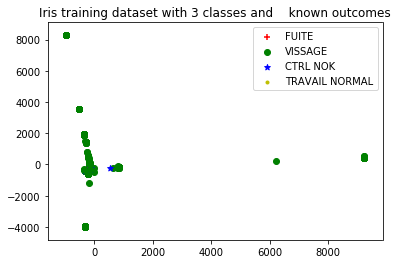

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='o')
    elif y_train[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='*')
    elif y_train[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',    marker='.')
        
pl.legend([c1, c2, c3,c4], ['FUITE', 'VISSAGE','CTRL NOK' ,  'TRAVAIL NORMAL'])
pl.title('Iris training dataset with 3 classes and    known outcomes')
pl.show()

C:\Users\benki\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MemoryError: 

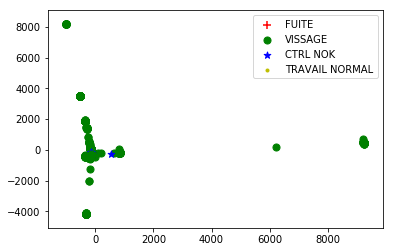

In [83]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pylab as pl
import numpy as np
X_train, X_test, y_train, y_test =   train_test_split(data_total_float,label , test_size=0.10, random_state=111)
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)
svmClassifier_2d =   svm.LinearSVC(random_state=111).fit(   pca_2d, y_train)
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')
    elif y_train[i] == 3:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',    marker='.')
        
pl.legend([c1, c2, c3,c4], ['FUITE', 'VISSAGE','CTRL NOK' ,  'TRAVAIL NORMAL'])
x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),   np.arange(y_min, y_max, .01))
Z = svmClassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface')
pl.axis('off')
pl.show()

In [64]:
!pip install mlxtend

NameError: name 'xx' is not defined

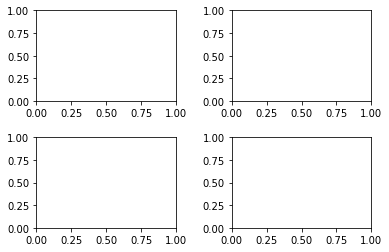

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
# Take the first two features. We could avoid this by using a two-dim dataset


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X_train, y_train) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X_train, X_test, y_train, y_test = train_test_split(data_total_float, label, test_size = 0.20)

clf = RandomForestClassifier(n_estimators=100,criterion = 'gini'
                             )
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [85]:
clf.score(X_train, y_train)

1.0

In [86]:
clf.score(X_test, y_test)

0.9791840133222315

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.97      1.00      0.99       470
           2       0.99      0.98      0.98       669
           3       0.95      1.00      0.97        19

    accuracy                           0.98      1201
   macro avg       0.96      0.95      0.95      1201
weighted avg       0.98      0.98      0.98      1201



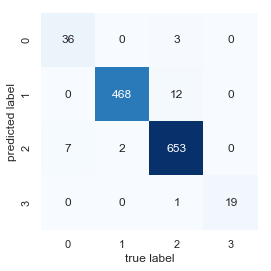

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap=plt.cm.Blues)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [95]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy',
            random_state = 100,max_depth= 4 , min_samples_leaf=14)
    
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.63      0.75        43
           1       0.97      0.97      0.97       470
           2       0.97      0.97      0.97       669
           3       0.68      1.00      0.81        19

    accuracy                           0.96      1201
   macro avg       0.89      0.89      0.87      1201
weighted avg       0.96      0.96      0.96      1201



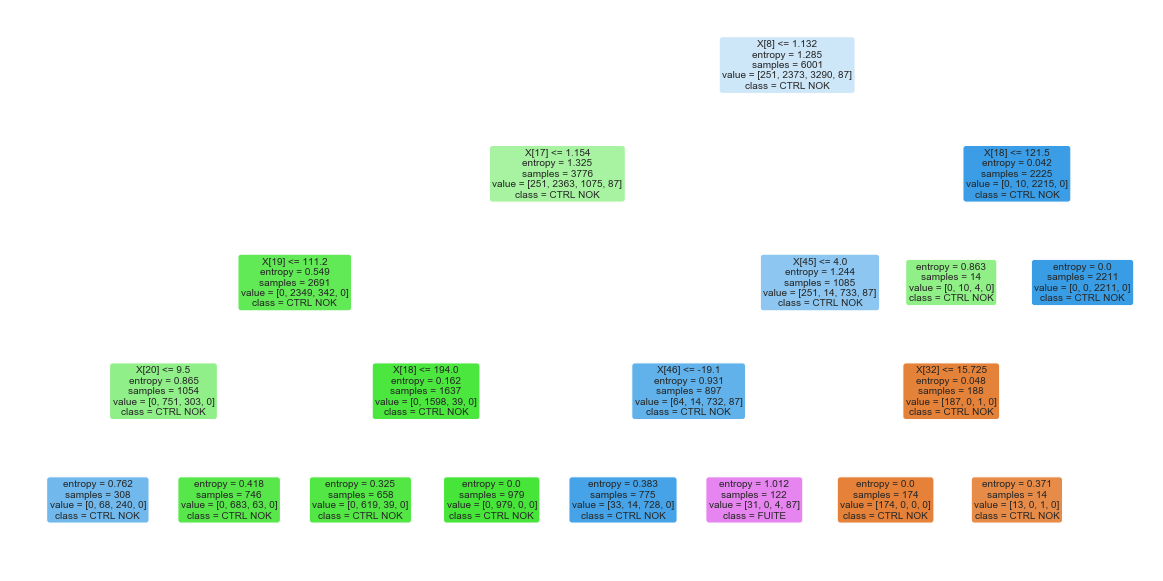

In [106]:
from sklearn import tree
plt.figure(figsize = (20,10))
tree.plot_tree(clf.fit(df, label) , class_names = d[0] ,fontsize = 10 , filled = True , label='all', rounded=True ) 
plt.show()

In [30]:
df = pd.DataFrame(data_total_float)

In [46]:
l = pd.DataFrame(label)
a = l.replace(0,'FUITE')
b = a.replace(1,'VISSAGE')
c = b.replace(2,'CTRL NOK')
d = c.replace(3,'TRAVAIL NORMAL')

In [51]:
d[0]

0       CTRL NOK
1       CTRL NOK
2       CTRL NOK
3          FUITE
4       CTRL NOK
5       CTRL NOK
6        VISSAGE
7       CTRL NOK
8        VISSAGE
9        VISSAGE
10       VISSAGE
11       VISSAGE
12       VISSAGE
13      CTRL NOK
14       VISSAGE
15       VISSAGE
16       VISSAGE
17      CTRL NOK
18       VISSAGE
19       VISSAGE
20       VISSAGE
21      CTRL NOK
22       VISSAGE
23       VISSAGE
24      CTRL NOK
25      CTRL NOK
26      CTRL NOK
27      CTRL NOK
28       VISSAGE
29       VISSAGE
          ...   
5971    CTRL NOK
5972    CTRL NOK
5973    CTRL NOK
5974     VISSAGE
5975    CTRL NOK
5976     VISSAGE
5977    CTRL NOK
5978       FUITE
5979    CTRL NOK
5980     VISSAGE
5981     VISSAGE
5982    CTRL NOK
5983    CTRL NOK
5984    CTRL NOK
5985    CTRL NOK
5986     VISSAGE
5987     VISSAGE
5988       FUITE
5989       FUITE
5990    CTRL NOK
5991     VISSAGE
5992    CTRL NOK
5993    CTRL NOK
5994    CTRL NOK
5995    CTRL NOK
5996    CTRL NOK
5997    CTRL NOK
5998     VISSA